Finding the Most Hated League of Legends Champions Based on Ban Rate
----------------

Each game of League of Legends starts with each team banning 5 champions then picking 5 champions. The banned champions cannot be picked for the game. There are 142 champions in the game with a large range of abilities and play styles. Roughly, the champions balance out to around a 50% win rate. Despite this, some champions are considered less fun to play against, so this report will try to determine who those champions are and why they are hated.

My hypothesis is that crowd control abilities will be a common theme amongst hated champions. Crowd control abilities limit the movements and actions that you can take in game. They result in the player not being able to play the game for a second which can make all the difference in the fast paced team fights. To me, it would make sense that these abilities are the least fun to play against because they limit the players ability to impact the game.

To start off, we will need data about each champions abilities. To do this, we can use the Riot Games [Static Data API](https://developer.riotgames.com/static-data.html). This API contains the champion data used by the League of Legends client, and has a JSON file for every champion in every patch. As of the writing of this tutorial, the latest patch is 8.24, so we will be using this to get our data. I have created an array with all the champions in the game as of now, and loop through it to get the JSON file containing the data for each champion, via a GET request to the Riot Games Static Data API. I then combine the data for each champion in a Pandas DataFrame object.

In [1]:
import requests
import pandas as pd 

champions = ["Aatrox","Ahri","Akali","Alistar","Amumu","Anivia","Annie","Ashe","AurelionSol","Azir","Bard","Blitzcrank","Brand",
"Braum","Caitlyn","Camille","Cassiopeia","Chogath","Corki","Darius","Diana","DrMundo","Draven","Ekko","Elise","Evelynn",
"Ezreal","Fiddlesticks","Fiora","Fizz","Galio","Gangplank","Garen","Gnar","Gragas","Graves","Hecarim","Heimerdinger",
"Illaoi","Irelia","Ivern","Janna","JarvanIV","Jax","Jayce","Jhin","Jinx","Kaisa","Kalista","Karma","Karthus","Kassadin",
"Katarina","Kayle","Kayn","Kennen","Khazix","Kindred","Kled","KogMaw","Leblanc","LeeSin","Leona","Lissandra","Lucian","Lulu",
"Lux","Malphite","Malzahar","Maokai","MasterYi","MissFortune","Mordekaiser","Morgana","Nami","Nasus","Nautilus","Neeko",
"Nidalee","Nocturne","Nunu","Olaf","Orianna","Ornn","Pantheon","Poppy","Pyke","Quinn","Rakan","Rammus","RekSai","Renekton",
"Rengar","Riven","Rumble","Ryze","Sejuani","Shaco","Shen","Shyvana","Singed","Sion","Sivir","Skarner","Sona","Soraka","Swain",
"Syndra","TahmKench","Taliyah","Talon","Taric","Teemo","Thresh","Tristana","Trundle","Tryndamere","TwistedFate","Twitch",
"Udyr","Urgot","Varus","Vayne","Veigar","Velkoz","Vi","Viktor","Vladimir","Volibear","Warwick","MonkeyKing","Xayah","Xerath",
"XinZhao","Yasuo","Yorick","Zac","Zed","Ziggs","Zilean","Zoe","Zyra" ]

ChampionsData = pd.DataFrame()
for champion in champions:
    url = "https://ddragon.leagueoflegends.com/cdn/8.24.1/data/en_US/champion/" + champion + ".json"
    r = requests.get(url)
    x = pd.DataFrame(r.json()['data']).T
    ChampionsData = ChampionsData.append(x)

ChampionsData.head()

,allytips,blurb,enemytips,id,image,info,key,lore,name,partype,passive,recommended,skins,spells,stats,tags,title
Aatrox,[Use Umbral Dash while casting The Darkin Blad...,Once honored defenders of Shurima against the ...,"[Aatrox's attacks are very telegraphed, so use...",Aatrox,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,Blood Well,"{'name': 'Deathbringer Stance', 'description':...","[{'champion': 'Aatrox', 'title': 'AatroxARAM',...","[{'id': '266000', 'num': 0, 'name': 'default',...","[{'id': 'AatroxQ', 'name': 'The Darkin Blade',...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]",the Darkin Blade
Ahri,"[Use Charm to set up your combos, it will make...",Innately connected to the latent power of Rune...,[Ahri's survivability is dramatically reduced ...,Ahri,"{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,Mana,"{'name': 'Vastayan Grace', 'description': 'Whe...","[{'champion': 'Ahri', 'title': 'AhriARAM', 'ma...","[{'id': '103000', 'num': 0, 'name': 'default',...","[{'id': 'AhriOrbofDeception', 'name': 'Orb of ...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]",the Nine-Tailed Fox
Akali,[Akali excels at killing fragile champions. Le...,Abandoning the Kinkou Order and her title of t...,[Akali can still be hit by area effect spells ...,Akali,"{'full': 'Akali.png', 'sprite': 'champion0.png...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,Energy,"{'name': 'Assassin's Mark', 'description': 'De...","[{'champion': 'Akali', 'title': 'AkaliARAM', '...","[{'id': '84000', 'num': 0, 'name': 'default', ...","[{'id': 'AkaliQ', 'name': 'Five Point Strike',...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],the Rogue Assassin
Alistar,[Using Pulverize can allow you to establish be...,Always a mighty warrior with a fearsome reputa...,[Alistar is very disruptive but very tough - t...,Alistar,"{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,Mana,"{'name': 'Triumphant Roar', 'description': 'Al...","[{'champion': 'Alistar', 'title': 'AlistarARAM...","[{'id': '12000', 'num': 0, 'name': 'default', ...","[{'id': 'Pulverize', 'name': 'Pulverize', 'des...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]",the Minotaur
Amumu,"[Amumu is highly dependent on teammates, so tr...",Legend claims that Amumu is a lonely and melan...,[Avoid bunching up with other allies when Amum...,Amumu,"{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,Mana,"{'name': 'Cursed Touch', 'description': 'Amumu...","[{'champion': 'Amumu', 'title': 'AmumuARAM', '...","[{'id': '32000', 'num': 0, 'name': 'default', ...","[{'id': 'BandageToss', 'name': 'Bandage Toss',...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]",the Sad Mummy


Next, we want to clean up this table so it is easier to work with. 

The JSON files provided by the Riot Games Static Data API have a lot of data that we don't need, so I start by dropping the unnecessary columns.
Next, we will be needing the data for each ability, but those are currently all mashed together in a single column of the table, so I use the apply() method with a lambda function to map each ability from the spells column to a new column of the table. Afterwards, I delete the spells column, because it is now redundant. 

In [2]:
ChampionsData.set_index('key')
ChampionsData = ChampionsData.drop(columns=['allytips', 'blurb', 'enemytips','id','image','partype','recommended','skins','title'])
ChampionsData['Q'] = ChampionsData.apply(lambda row: row['spells'][0], axis = 1)
ChampionsData['W'] = ChampionsData.apply(lambda row: row['spells'][1], axis = 1)
ChampionsData['E'] = ChampionsData.apply(lambda row: row['spells'][2], axis = 1)
ChampionsData['R'] = ChampionsData.apply(lambda row: row['spells'][3], axis = 1)
ChampionsData = ChampionsData.drop(columns=['spells'])
ChampionsData.head(5)

,info,key,lore,name,passive,stats,tags,Q,W,E,R
Aatrox,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Once honored defenders of Shurima against the ...,Aatrox,"{'name': 'Deathbringer Stance', 'description':...","{'hp': 580, 'hpperlevel': 80, 'mp': 0, 'mpperl...","[Fighter, Tank]","{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc..."
Ahri,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Innately connected to the latent power of Rune...,Ahri,"{'name': 'Vastayan Grace', 'description': 'Whe...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","[Mage, Assassin]","{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd..."
Akali,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Abandoning the Kinkou Order and her title of t...,Akali,"{'name': 'Assassin's Mark', 'description': 'De...","{'hp': 550, 'hpperlevel': 85, 'mp': 200, 'mppe...",[Assassin],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ..."
Alistar,"{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Always a mighty warrior with a fearsome reputa...,Alistar,"{'name': 'Triumphant Roar', 'description': 'Al...","{'hp': 573.36, 'hpperlevel': 106, 'mp': 278.84...","[Tank, Support]","{'id': 'Pulverize', 'name': 'Pulverize', 'desc...","{'id': 'Headbutt', 'name': 'Headbutt', 'descri...","{'id': 'AlistarE', 'name': 'Trample', 'descrip...","{'id': 'FerociousHowl', 'name': 'Unbreakable W..."
Amumu,"{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Legend claims that Amumu is a lonely and melan...,Amumu,"{'name': 'Cursed Touch', 'description': 'Amumu...","{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ...","[Tank, Mage]","{'id': 'BandageToss', 'name': 'Bandage Toss', ...","{'id': 'AuraofDespair', 'name': 'Despair', 'de...","{'id': 'Tantrum', 'name': 'Tantrum', 'descript...","{'id': 'CurseoftheSadMummy', 'name': 'Curse of..."


Now, for each champion we calculate a "CC Score". This score is calculated by scanning the tooltips for each ability of each champion, looking for keywords that relate to crowd-control. We use the following point values to calculate the score:

  Keyword  | Points
  ---------| -------------
  Supress  | 3
  Knock    | 3
  Stun     | 2.5
  Charm    | 2.5
  Snare    | 2
  Entangle | 2
  Taunt    | 1.5
  Pull     | 1.5
  Slow     | 1
  Silence  | 0.5
  
We only count the highest point keyword per ability, so an ability that both slows and knocks up will only get 3 points. Note that this score merely serves as a vague estimate. There are many inaccuracies as we can't know how difficult it is to perform the crowd control, the cost, or the number of champions it can affect at once. We only check that the ability has the capability of performing this crowd control. 


In [3]:
def getCCScore(champion):
    result = 0
    if('supress' in champion.loc['passive']['description']):
        result+=3
    elif('knock' in champion.loc['passive']['description']):
        result+=3
    elif('stun' in champion.loc['passive']['description'] or 'charm' in champion.loc['passive']['description'] ):
        result+=2.5
    elif('snare' in champion.loc['passive']['description'] or 'entangle' in champion.loc['passive']['description']):
        result+=2
    elif('taunt' in champion.loc['passive']['description'] or 'pull' in champion.loc['passive']['description']):
        result+=1.5
    elif('slow' in champion.loc['passive']['description']):
        result+=1
    elif('silence' in champion.loc['passive']['description']):
        result+=.5
    for ability in ['Q', 'W', 'E', 'R']:
        if('supress' in champion.loc[ability]['tooltip']):
            result+=3
        elif('knock' in champion.loc[ability]['tooltip']):
            result+=3
        elif('stun' in champion.loc[ability]['tooltip'] or 'charm' in champion.loc[ability]['tooltip'] ):
            result+=2.5
        elif('snare' in champion.loc[ability]['tooltip'] or 'entangle' in champion.loc[ability]['tooltip']):
            result+=2
        elif('taunt' in champion.loc[ability]['tooltip'] or 'pull' in champion.loc[ability]['tooltip']):
            result+=1.5
        elif('slow' in champion.loc[ability]['tooltip']):
            result+=1
        elif('silence' in champion.loc[ability]['tooltip']):
            result+=.5
    return result

ChampionsData['CC Score'] = ChampionsData.apply(lambda row: getCCScore(row), axis = 1)
ChampionsData['key'] = pd.to_numeric(ChampionsData['key'])

Now we will start looking at some match data. We can get this by performing a GET request on champion.gg's API. First we will get the data and save it to a DataFrame called rates. 

In [4]:
r = requests.get('http://api.champion.gg/v2/champions?elo=GOLD&champData=winRate&limit=2000&api_key=aa2c48dbf711614fb6f00dc2827b119a')
x = r.json()
rates = pd.DataFrame(x).sort_values(by=['championId'])
rates.head()

,_id,banRate,championId,elo,gamesPlayed,patch,percentRolePlayed,playRate,role,winRate
178,"{'championId': 1, 'role': 'DUO_SUPPORT'}",0.001175,1,GOLD,1868,8.24,0.254115,0.005049,DUO_SUPPORT,0.492505
136,"{'championId': 1, 'role': 'MIDDLE'}",0.001175,1,GOLD,3789,8.24,0.515440,0.010241,MIDDLE,0.515967
182,"{'championId': 2, 'role': 'TOP'}",0.000421,2,GOLD,1756,8.24,0.310686,0.004746,TOP,0.463554
148,"{'championId': 2, 'role': 'JUNGLE'}",0.000421,2,GOLD,3198,8.24,0.565817,0.008644,JUNGLE,0.487805
183,"{'championId': 3, 'role': 'DUO_SUPPORT'}",0.001419,3,GOLD,1752,8.24,0.147574,0.004736,DUO_SUPPORT,0.501712


Now I want to collect the winrate, banrate, and playrate for each champion. Since champion.gg stores separate data for each role (top, jungle, middle, bottom, and support) for each champion, I do a groupby to merge the data into something I can join with. For winrate, it makes sense to take the average of the roles winrates. For playrate, I took the sum for the groupby to get the total playrate across all roles. Banrate is independent of role, so it is the same value for every role.
* Winrate is the percentage of games that that champion wins when it gets picked
* Playrate is the percentage of games that a champion gets picked in out of the total number of games that they could possibly be picked in.
* Banrate is the pers

In [5]:
winrates = rates.groupby(['championId'])['winRate'].mean().to_frame()
playrates = rates.groupby(['championId'])['playRate'].sum().to_frame()
banrates = rates.groupby(['championId'])['banRate'].max().to_frame()

I can now join with these tables to add them to our ChampionsData table.

In [6]:
ChampionsData['key'] = ChampionsData['key'].astype(int)
ChampionsData = ChampionsData.set_index('key')

ChampionsData = ChampionsData.merge(banrates, left_index=True, right_index=True, how='left')
ChampionsData = ChampionsData.merge(winrates, left_index=True, right_index=True, how='left')
ChampionsData = ChampionsData.merge(playrates, left_index=True, right_index=True, how='left')

ChampionsData = ChampionsData.drop(columns=['lore','passive','stats','Q','W','E','R','info'])
ChampionsData.head()

,name,tags,CC Score,banRate,winRate,playRate
key,,,,,,
266,Aatrox,"[Fighter, Tank]",4.0,0.029309,0.478664,0.048001
103,Ahri,"[Mage, Assassin]",2.5,0.006586,0.525521,0.047447
84,Akali,[Assassin],3.5,0.054321,0.435035,0.047107
12,Alistar,"[Tank, Support]",8.0,0.009402,0.489365,0.051340
32,Amumu,"[Tank, Mage]",4.5,0.000793,0.523650,0.025886


Using our new winrate column, we can plot CC Score against winrate to see that there is no direct correlation between champions that have a lot of crowd control and winrate. 

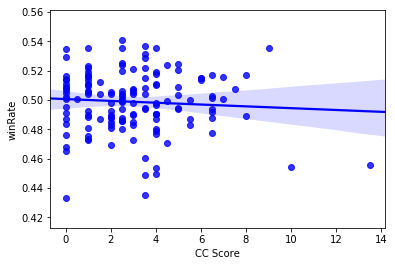

In [19]:
import seaborn as sns
ax = sns.regplot(x='CC Score', y='winRate', data=ChampionsData, color ='blue')


Each champion has a classification which determines their playstyle:
* Assassins are mobile and do large amounts of damage usually with short range.
* Fighters are a split between damage and survivability with short range.
* Mages are long range and do large amounts of damage with abilities.
* Marksmen are ranged champions that get stronger over time.
* Supports are capable of protecting teammates through shields and healing.
* Tanks are very durable and often have crowd control abilities.

Because they vary in style, I decided to split them into their own groups to see if their classification affects banrate.

In [20]:
ChampionsData['primaryRole'] = ''
for k,row in ChampionsData.iterrows():
    row['primaryRole'] = row['tags'][0]
    ChampionsData.loc[k] = row
ChampionsData = ChampionsData.drop(columns=['tags'])


In this bar graph, it can be seen that Assassins are banned more than any other class, and Tanks and Supports are banned the least. This means that Assassins are likely the least fun type of champion to play against due to the high banrate.

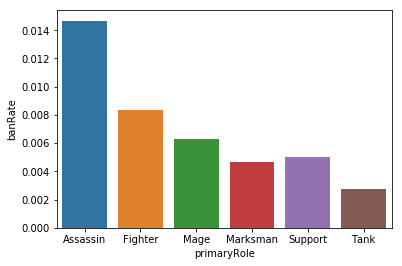

In [9]:
RolesData = ChampionsData.groupby(['primaryRole'])['banRate'].mean()

ax = sns.barplot(x='primaryRole', y="banRate", data=RolesData.to_frame().reset_index())

In an attempt to find other aspects correlated to banrate, I plotted the crowd control score calculated above against banrate. I had thought that there may be a positive correlation here because crowd control limits the player from playing the game, so it would make sense that champions with a lot of it would be disliked. Instead, there is no significant correlation.

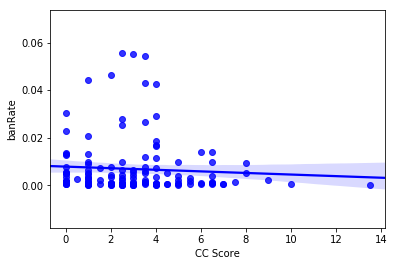

In [10]:
sns.regplot(x='CC Score', y='banRate', data=ChampionsData, color ='blue')


Here is an interesting graph that confirms what I found above. This plots the average crowd control score for each class of champion. Tanks and supports have a significantly higher crowd control score on average, but they have a lower banrate as well. This means there is likely a negative correlation between crowd control score and banrate.

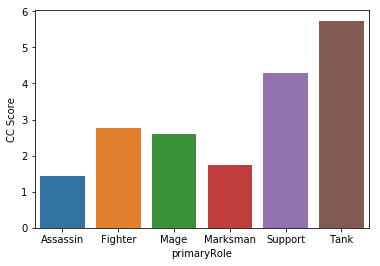

In [11]:
RolesData = ChampionsData.groupby(['primaryRole'])['CC Score'].mean()
ax = sns.barplot(x='primaryRole', y="CC Score", data=RolesData.to_frame().reset_index())

This shows that there is no real correlation between winrate and banrate. I thought that people might ban champions that win more often, but this shows that that is not true.

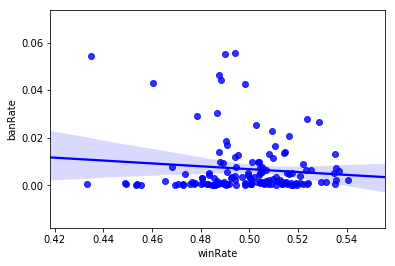

In [18]:
sns.regplot(x='winRate', y='banRate', data=ChampionsData, color ='blue')


This graph shows how playrate and banrate are correlated. It makes sense that champions that are played more often, end up getting banned more often. In order to find the most disliked champions, I will normalize the banrate of champions based on their playrate to see which champions are banned relatively more.

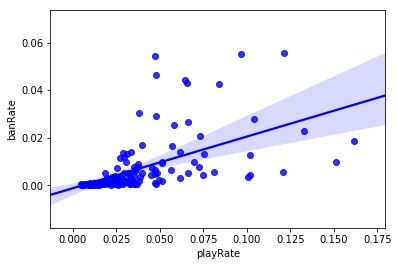

In [12]:
sns.regplot(x='playRate', y='banRate', data=ChampionsData, color ='blue')


Running a least squares regression on the data to produce a model will allow for making a graph of residuals.

In [13]:
import statsmodels.api as sm

x = ChampionsData['playRate']
y = ChampionsData['banRate']

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                banRate   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           6.06e-22
Time:                        04:18:47   Log-Likelihood:                 457.51
No. Observations:                 142   AIC:                            -913.0
Df Residuals:                     141   BIC:                            -910.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
playRate       0.1971      0.017     11.477      0.000       0.163       0.231
==============================================================================
Omnibus:                       91.344   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.266
Skew:                           2.427   Prob(JB):                     2.77e-98
Kurtosis:                      10.237   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the residuals can be calculated by subtracting the predicted banrate generated by the model from the actual banrate from champion.gg statistics.

In [21]:
predictions = model.predict(x)
predictions
ChampionsData['residual'] = ChampionsData['banRate']-model.predict(ChampionsData['playRate'])
ChampionsData.head()

,name,CC Score,banRate,winRate,playRate,primaryRole,residual
key,,,,,,,
266,Aatrox,4.0,0.029309,0.478664,0.048001,Fighter,0.019848
103,Ahri,2.5,0.006586,0.525521,0.047447,Mage,-0.002766
84,Akali,3.5,0.054321,0.435035,0.047107,Assassin,0.045036
12,Alistar,8.0,0.009402,0.489365,0.051340,Tank,-0.000718
32,Amumu,4.5,0.000793,0.523650,0.025886,Tank,-0.004309


The residual graph shows two things. First, it shows that the linear model does a decent job at matching the data. Because the residuals are randomly distributed above and below the line, it shows that there isn't another relationship happening. The second part that I can observe is the disproportionately banned champions. They will be the champions with the greatest residuals.

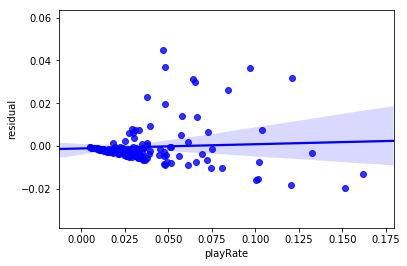

In [15]:
sns.regplot(x='playRate', y='residual', data=ChampionsData, color ='blue')


Here is the list of the top 10 champions that are disproportionately banned based on their playrate. This list is made up of the most disliked champions to play against.

In [22]:
ChampionsData.sort_values(['residual'], ascending=False).head(10)

,name,CC Score,banRate,winRate,playRate,primaryRole,residual
key,,,,,,,
84,Akali,3.5,0.054321,0.435035,0.047107,Assassin,0.045036
122,Darius,2.0,0.046430,0.487430,0.047950,Fighter,0.036978
157,Yasuo,3.0,0.055357,0.489891,0.096852,Fighter,0.036266
518,Neeko,2.5,0.055558,0.493958,0.121402,Mage,0.031627
238,Zed,1.0,0.044190,0.488488,0.064214,Assassin,0.031532
39,Irelia,3.5,0.042978,0.460559,0.065568,Fighter,0.030054
555,Pyke,4.0,0.042602,0.498248,0.084086,Support,0.026027
7,LeBlanc,0.0,0.030468,0.486901,0.037865,Assassin,0.023005
266,Aatrox,4.0,0.029309,0.478664,0.048001,Fighter,0.019848


Here is the list of the bottom 10 champions that are disproportionately not banned based on their playrate. This list is made up of the least disliked champions to play against. Banning these champions will result in a higher chance of banning someone out on the other team.

In [17]:
ChampionsData.sort_values(['residual'], ascending=True).head(10)

,name,tags,CC Score,banRate,winRate,playRate,primaryRole,residual
key,,,,,,,,
412,Thresh,"[Support, Fighter]",6.5,0.009912,0.501286,0.151305,Support,-0.019913
81,Ezreal,"[Marksman, Mage]",0.0,0.005672,0.490835,0.120616,Marksman,-0.018103
99,Lux,"[Mage, Support]",1.0,0.003642,0.511172,0.100403,Mage,-0.016149
202,Jhin,"[Marksman, Assassin]",2.0,0.004433,0.503832,0.101560,Marksman,-0.015586
64,Lee Sin,"[Fighter, Assassin]",4.0,0.018605,0.490507,0.161733,Fighter,-0.013275
51,Caitlyn,[Marksman],3.0,0.004362,0.483214,0.074552,Marksman,-0.010334
67,Vayne,"[Marksman, Assassin]",3.0,0.005619,0.505345,0.080910,Marksman,-0.010330
222,Jinx,[Marksman],1.0,0.000575,0.505935,0.048045,Marksman,-0.008895
92,Riven,"[Fighter, Assassin]",5.5,0.003289,0.500153,0.061538,Fighter,-0.008841
